# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
A = main.spare_matrix_Abt(50, 12)

Metoda 1

In [5]:
%%timeit -n10 -r10

x = main.square_from_rectan(A[0], A[1])
x_new = np.linalg.solve(x[0], x[1])

The slowest run took 4.51 times longer than the fastest. This could mean that an intermediate result is being cached.
38.1 µs ± 21.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [6]:
%memit

x = main.square_from_rectan(A[0], A[1])
x_new = np.linalg.solve(x[0], x[1])

peak memory: 85.00 MiB, increment: 0.31 MiB


Metoda 2

In [7]:
%%timeit -n10 -r10

x = np.linalg.lstsq(A[0], A[1], rcond = -1)[0]

The slowest run took 8.10 times longer than the fastest. This could mean that an intermediate result is being cached.
187 µs ± 176 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [8]:
%memit

x = np.linalg.lstsq(A[0], A[1], rcond = -1)[0]

peak memory: 85.90 MiB, increment: 0.00 MiB


Metoda 3

In [9]:
%%timeit -n10 -r10

q, r = np.linalg.qr(A[0])
x_qr = sp.linalg.solve_triangular(r, q.T @ A[1])

221 µs ± 85.9 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [10]:
%memit

q, r = np.linalg.qr(A[0])
x_qr = sp.linalg.solve_triangular(r, q.T @ A[1])

peak memory: 86.05 MiB, increment: 0.00 MiB


Metoda 4

In [11]:
%%timeit -n10 -r10

U,s,V=np.linalg.svd(A[0], full_matrices=False)
S=np.diag(s)
x_svd=V.T@np.linalg.solve(S, U.T@A[1])

The slowest run took 8.97 times longer than the fastest. This could mean that an intermediate result is being cached.
261 µs ± 239 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [12]:
%memit

U,s,V=np.linalg.svd(A[0], full_matrices=False)
S=np.diag(s)
x_svd=V.T@np.linalg.solve(S, U.T@A[1])

peak memory: 86.22 MiB, increment: 0.00 MiB


In [13]:
x = main.square_from_rectan(A[0], A[1])
x_new = np.linalg.solve(x[0], x[1])
x = np.linalg.lstsq(A[0], A[1], rcond = -1)[0]
q, r = np.linalg.qr(A[0])
x_qr = sp.linalg.solve_triangular(r, q.T @ A[1])
U,s,V=np.linalg.svd(A[0], full_matrices=False)
S=np.diag(s)
x_svd=V.T@np.linalg.solve(S, U.T@A[1])

print(f"Dla Metody nr 1 norma residuum wynosi {main.residual_norm(A[0], x_new, A[1])}")
print(f"Dla Metody nr 2 norma residuum wynosi {main.residual_norm(A[0], x, A[1])}")
print(f"Dla Metody nr 3 norma residuum wynosi {main.residual_norm(A[0], x_qr, A[1])}")
print(f"Dla Metody nr 4 norma residuum wynosi {main.residual_norm(A[0], x_svd, A[1])}")

Dla Metody nr 1 norma residuum wynosi 9.204202273829557e-08
Dla Metody nr 2 norma residuum wynosi 7.999155131091207e-09
Dla Metody nr 3 norma residuum wynosi 7.99915439937309e-09
Dla Metody nr 4 norma residuum wynosi 7.999154171198579e-09


Można zauważyć, że każda z metod zajmuje podobną wartość pamięci, lecz różni się prędkość ich wykonania. Najszybsza okazała się metoda pierwsza a najwolniejsza metoda czwarta. Różnica w prędkości wykonywania metody pierwszej i czwartej jest duża, ponieważ pierwsza wykonuje się prawie 8 razy szybciej niż czwarta. Zauważyłem także, że wartości czasu, który trzeba poświęcić na wykonanie metod zmienia się po każdym uruchomieniu i nie zawsze wyniki wychodzą takie same. Natomiast norma residuum jest największa dla pierwszej metody. Normy residuum dla pozostałych metod są bardzo podobne i niewiele mniejsze niż pierwsza metoda.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [14]:
pred1=[min(x1), max(x1)]
pred2=[min(x2), max(x2)]

NameError: name 'x1' is not defined

In [15]:
x1 = np.random.normal(0, 1, size=(100, 1))
x2 = np.random.normal(0, 1, size=(100, 1))
eps = np.random.normal(0, 1, (100,1))

y = 2 + x1 -0.5*x2 + eps

wek_0 = np.ones((100, 1))
cont_x1 = np.concatenate((wek_0, x1), axis=1)
cont_x2 = np.concatenate((wek_0, x2), axis=1)
cont_x1_x2 = np.concatenate((wek_0,x1, x2), axis=1)

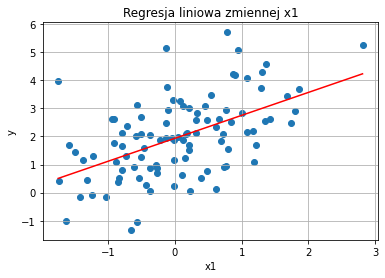

In [16]:
q, r = np.linalg.qr(cont_x1)
x = sp.linalg.solve_triangular(r, q.T @ y)
pred1=[min(x1), max(x1)]
y_aprox = x[0] + x[1] * pred1

plt.scatter(x1,y)
plt.plot(pred1, y_aprox, "r")
plt.grid()
plt.title("Regresja liniowa zmiennej x1")
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

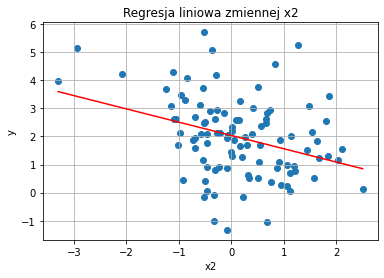

In [17]:
q, r = np.linalg.qr(cont_x2)
x = sp.linalg.solve_triangular(r, q.T @ y)
pred2=[min(x2), max(x2)]
y_aprox = x[0] +x[1] * pred2

plt.scatter(x2, y)
plt.plot(pred2,y_aprox, "r")
plt.grid()
plt.title("Regresja liniowa zmiennej x2")
plt.xlabel("x2")
plt.ylabel("y")
plt.show

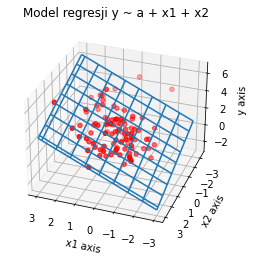

In [18]:
q, r = np.linalg.qr(cont_x1_x2)
x = sp.linalg.solve_triangular(r, q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x1
Y = x2
Z = y

ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x1 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y ~ a + x1 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = x[0] + x[1] * X + x[2] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)

ax.view_init(30,110)


plt.show()

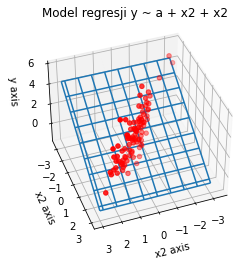

In [29]:
q, r = np.linalg.qr(cont_x2)
x = sp.linalg.solve_triangular(r, q.T @ y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x2
Y = x2
Z = y

ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x2 axis")
ax.set_ylabel("x2 axis")
ax.set_zlabel("y axis")
plt.title("Model regresji y ~ a + x2 + x2")

X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = x[0] + x[1] * Y + x[1] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride=12)

ax.view_init(40,70)

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)